In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns # For Visualization
from pprint import pprint
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 5000)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
youtube = pd.read_excel(r"songs_prediction.xlsx")
youtube.head()

,Category,Creator_Genre,Creator_FollowerCount,Follower_Group,Views_Day_1,Views_Day_2,Views_Day_3,Views_Day_7,"Total_Views_Day_1,2,3,7",Views_Day_30,%_Of_Views_Day_1,%_Of_Views_Day_2,%_Of_Views_Day_3,%_Of_Views_Day_7,Increase_in_Day_2,Increase_in_Day_3,Increase_in_Day_7,Avg_Views_Increase_Day_1-7,%_of_Increase_in_Day_2,%_of_Increase_in_Day_3,%_of_Increase_in_Day_7,Avg_Views_Day_1-2,Avg_Views_Day_1-3,Avg_Views_Day_1-7,Likes,Comments,Engagement_Day_1,Engagement_Day_2,Engagement_Day_3,Engagement_Day_7,"Total_Engagements_Day_1,2,3,7",Engagement_Day_30,%_Of_Engagement_Day_1,%_Of_Engagement_Day_2,%_Of_Engagement_Day_3,%_Of_Engagement_Day_7,Eng_Increase_in_Day_2,Eng_Increase_in_Day_3,Eng_Increase_in_Day_7,Avg_Eng_Increase_Day_1-7,%_Of_Eng_Increase_in_Day_2,%_Of_Eng_Increase_in_Day_3,%_Of_Eng_Increase_in_Day_7,Avg_Eng_Day_1-2,Avg_Eng_Day_1-3,Avg_Eng_Day_1-7,Platform2_Total_Engagements,Platform_3,Platform_Ranking,Published_Date,Published_Month,Published_Day,Published_Hour,Published_Hour_24,Duration (seconds),Duration (Minutes)
0,Music,Music & Dance,9660000,Group A,3597758,11222393,20463037,43768913,79052101,176308911.0,0.045511,0.141962,0.258855,0.553672,7624635,9240644,23305876,20085577.5,2.119274,0.823411,1.138926,7410075.5,1.176106e+07,19763025.25,4260971,160521,4.5224,2.4483,1.7798,1.5514,10.3019,1.3082,0.438987,0.237655,0.172764,0.150594,-2.0741,-0.6685,-0.2284,-0.990333,-0.458628,-0.273047,-0.128329,3.48535,2.916833,2.575475,43325,YES,2.5,3/27/XXXX,March,27,7 AM,7,305,5.083333
1,Music,Music & Dance,43700000,Group A,13532556,27356275,37082603,60812275,138783709,126034919.0,0.097508,0.197114,0.267197,0.438180,13823719,9726328,23729672,23639859.5,1.021516,0.355543,0.639914,20444415.5,2.599048e+07,34695927.25,1887553,63375,0.7251,0.6689,0.6383,0.6284,2.6607,0.7041,0.272522,0.251400,0.239899,0.236178,-0.0562,-0.0306,-0.0099,-0.032233,-0.077507,-0.045747,-0.015510,0.69700,0.677433,0.665175,12691,YES,2.5,3/3/XXXX,March,3,5 AM,5,148,2.466667
2,Music,Film & Movies,18300000,Group A,5729565,9806498,13416437,26282401,55234901,95908751.0,0.103731,0.177542,0.242898,0.475830,4076933,3609939,12865964,10276418.0,0.711561,0.368117,0.958970,7768031.5,9.650833e+06,13808725.25,1399015,54040,1.9402,1.6469,1.5036,1.1778,6.2685,0.6732,0.309516,0.262726,0.239866,0.187892,-0.2933,-0.1433,-0.3258,-0.254133,-0.151170,-0.087012,-0.216680,1.79355,1.696900,1.567125,55100,YES,2.5,2/28/XXXX,February,28,4 AM,4,231,3.850000
3,People & Blogs,General Interest,7833946,Group A,27053,42547,50945,73701,194246,146384.0,0.139272,0.219037,0.262271,0.379421,15494,8398,22756,23324.0,0.572728,0.197382,0.446678,34800.0,4.018167e+04,48561.50,1763073,4944,0.6786,0.6675,0.6870,0.7108,2.7439,0.7829,0.247312,0.243267,0.250374,0.259047,-0.0111,0.0195,0.0238,0.010733,-0.016357,0.029213,0.034643,0.67305,0.677700,0.685975,2801,NO,2.0,3/8/XXXX,March,8,5 AM,5,16,0.266667
4,Music,Music & Dance,72500000,Group A,21311377,34382612,46345158,73383883,175423030,NaN,0.121486,0.195998,0.264191,0.418325,13071235,11962546,27038725,26036253.0,0.613345,0.347924,0.583421,27846994.5,3.401305e+07,43855757.50,1016093,222000,1.2104,0.9884,0.8456,0.6876,3.7320,NaN,0.324330,0.264845,0.226581,0.184244,-0.2220,-0.1428,-0.1580,-0.174267,-0.183410,-0.144476,-0.186850,1.09940,1.014800,0.933000,88659,YES,2.5,4/26/XXXX,April,26,5 AM,5,180,3.000000


In [4]:
# Replacing/Filling NA values 
youtube['%_Of_Engagement_Day_1'].fillna(0, inplace = True)
youtube['%_Of_Eng_Increase_in_Day_2'].fillna(0, inplace = True)
youtube['%_Of_Engagement_Day_2'].fillna(0, inplace = True)
youtube['%_Of_Engagement_Day_3'].fillna(0, inplace = True)
youtube['%_Of_Eng_Increase_in_Day_3'].fillna(0, inplace = True)
youtube['%_Of_Eng_Increase_in_Day_7'].fillna(0, inplace = True)
youtube['%_Of_Engagement_Day_7'].fillna(0, inplace = True)
youtube['Views_Day_30'].fillna(0, inplace = True)
youtube['Engagement_Day_30'].fillna(0, inplace = True)

In [5]:
youtube1 = youtube.select_dtypes(['object']).columns
print(youtube1)

Index(['Category', 'Creator_Genre', 'Follower_Group', 'Platform_3',
       'Published_Date', 'Published_Month', 'Published_Hour'],
      dtype='object')


In [6]:
youtube2 = pd.get_dummies(youtube, columns = youtube1)
youtube2.isna().sum()

Creator_FollowerCount                           0
Views_Day_1                                     0
Views_Day_2                                     0
Views_Day_3                                     0
Views_Day_7                                     0
Total_Views_Day_1,2,3,7                         0
Views_Day_30                                    0
%_Of_Views_Day_1                                0
%_Of_Views_Day_2                                0
%_Of_Views_Day_3                                0
%_Of_Views_Day_7                                0
Increase_in_Day_2                               0
Increase_in_Day_3                               0
Increase_in_Day_7                               0
Avg_Views_Increase_Day_1-7                      0
%_of_Increase_in_Day_2                          0
%_of_Increase_in_Day_3                          0
%_of_Increase_in_Day_7                          0
Avg_Views_Day_1-2                               0
Avg_Views_Day_1-3                               0


Varaible Selection using Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
X = youtube2.drop(['Views_Day_30','Engagement_Day_30'], axis = 1)
y = youtube2['Engagement_Day_30']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
rf.feature_importances_

array([2.14503940e-03, 1.54152700e-03, 1.26220688e-03, 2.18171516e-03,
       2.04878387e-03, 2.14351953e-03, 2.06739680e-03, 3.36793730e-03,
       5.52831383e-03, 2.75046185e-03, 4.04414896e-03, 2.79475770e-03,
       1.91936380e-03, 2.73580724e-03, 1.93166003e-03, 2.11804035e-03,
       6.23745426e-03, 9.18094633e-04, 1.41205691e-03, 2.01440287e-03,
       9.27952575e-03, 3.30841554e-03, 2.44595293e-03, 4.38461837e-03,
       2.82169017e-02, 5.29888200e-01, 3.52235355e-03, 9.45134435e-04,
       5.90451792e-03, 1.51890766e-03, 2.60027818e-03, 1.13832919e-03,
       1.56477033e-03, 1.26021784e-02, 8.94459325e-04, 1.28104259e-03,
       1.33901330e-03, 9.50658303e-03, 2.01290875e-03, 2.67546524e-03,
       5.29044593e-03, 9.41772025e-03, 1.05602844e-03, 1.24879909e-01,
       2.09721980e-03, 4.43094935e-03, 5.13313229e-03, 7.56372964e-06,
       4.72690181e-04, 3.18448573e-04, 3.53811170e-04, 1.89649469e-05,
       1.79103563e-04, 8.69973956e-05, 4.03347070e-04, 2.38108607e-06,
      

Text(0.5, 0, 'Random Forest Feature Importance')

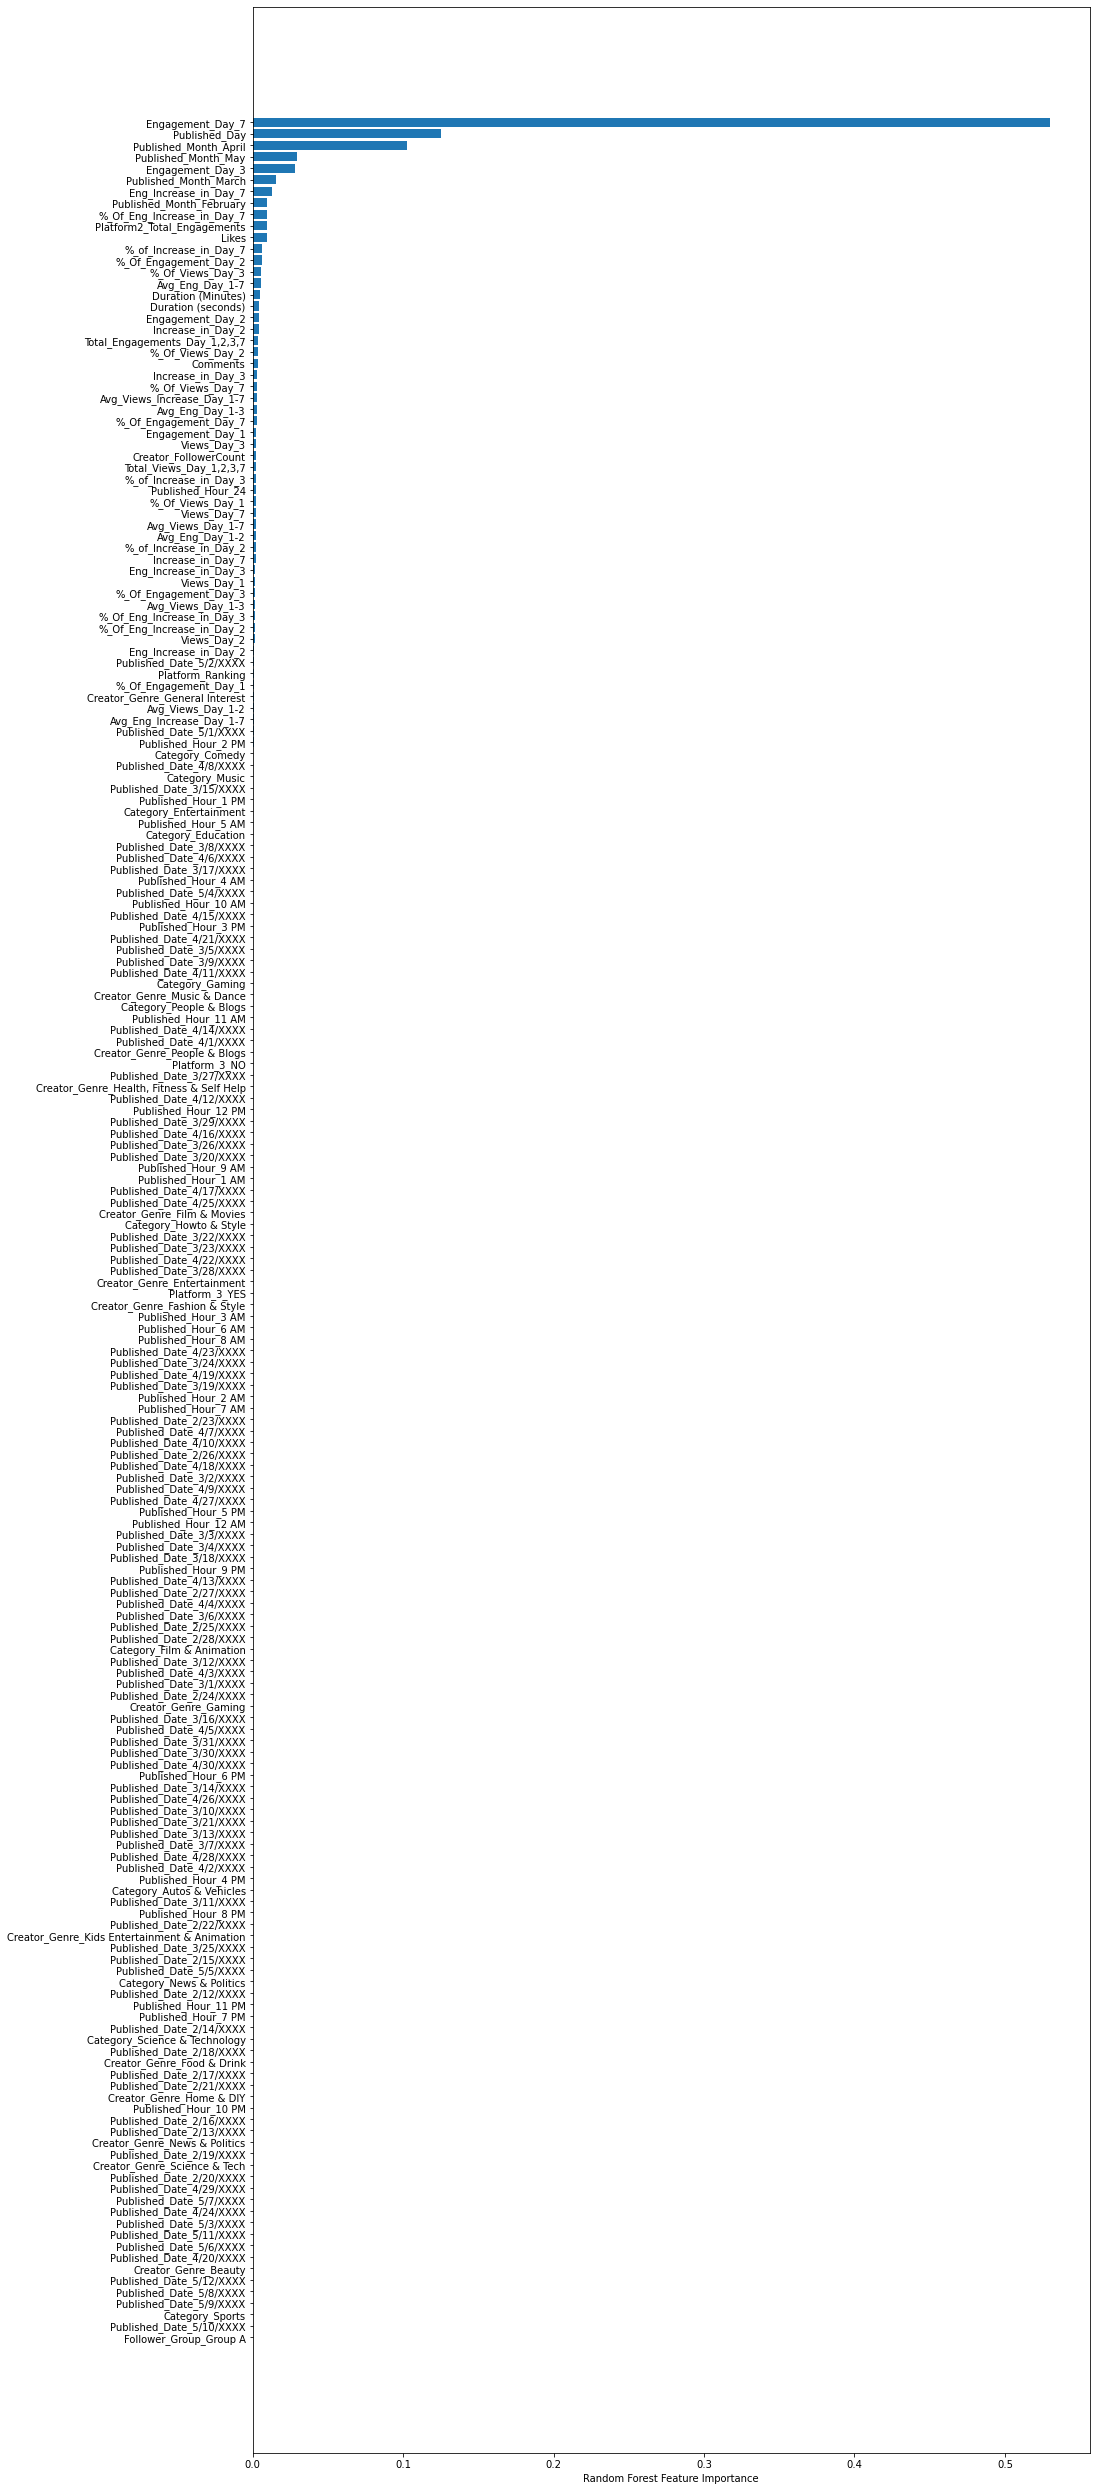

In [12]:
plt.figure(figsize=(15, 45))
# Sorted Features in Descending Order
sorted_idx = rf.feature_importances_.argsort()
z = X.columns[sorted_idx]
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [13]:
pprint(z)

Index(['Follower_Group_Group A', 'Published_Date_5/10/XXXX', 'Category_Sports',
       'Published_Date_5/9/XXXX', 'Published_Date_5/8/XXXX',
       'Published_Date_5/12/XXXX', 'Creator_Genre_Beauty',
       'Published_Date_4/20/XXXX', 'Published_Date_5/6/XXXX',
       'Published_Date_5/11/XXXX',
       ...
       'Platform2_Total_Engagements', '%_Of_Eng_Increase_in_Day_7',
       'Published_Month_February', 'Eng_Increase_in_Day_7',
       'Published_Month_March', 'Engagement_Day_3', 'Published_Month_May',
       'Published_Month_April', 'Published_Day', 'Engagement_Day_7'],
      dtype='object', length=194)


In [14]:
display(len(z))
# Arranged List in revevrsed Order
j = reversed(z)

194

In [15]:
feature_list = []
for i in j:
    feature_list.append(i)

In [16]:
print(len(feature_list))
cols_to_select = feature_list[:16]

194


In [17]:
pprint(cols_to_select)

['Engagement_Day_7',
 'Published_Day',
 'Published_Month_April',
 'Published_Month_May',
 'Engagement_Day_3',
 'Published_Month_March',
 'Eng_Increase_in_Day_7',
 'Published_Month_February',
 '%_Of_Eng_Increase_in_Day_7',
 'Platform2_Total_Engagements',
 'Likes',
 '%_of_Increase_in_Day_7',
 '%_Of_Engagement_Day_2',
 '%_Of_Views_Day_3',
 'Avg_Eng_Day_1-7',
 'Duration (Minutes)']


In [18]:
X = youtube2[youtube2.columns.intersection(cols_to_select)]
y = youtube2['Engagement_Day_30']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
rg = RandomForestRegressor()
rg.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
y_pred = rg.predict(x_test)
y_pred

array([3.91732001e-01, 8.88800003e-01, 1.40173999e-01, 1.88755001e-01,
       1.25838200e+00, 0.00000000e+00, 1.93748601e+00, 2.98505999e-01,
       1.16932300e+00, 1.14761800e+00, 4.88862996e-01, 2.04290000e-01,
       1.39115899e+00, 4.03580002e-02, 6.73300028e-03, 8.33899975e-03,
       0.00000000e+00, 3.51857003e-01, 1.20912300e+00, 1.08263001e-01,
       7.21810007e-02, 7.54173996e-01, 1.30175900e+00, 7.57523003e-01,
       1.18002000e-01, 1.31100002e-02, 1.14061001e-01, 2.14294997e-01,
       1.15409994e-02, 2.48838001e-01, 7.83999980e-03, 3.63267004e-01,
       2.15794300e+00, 5.98351998e-01, 1.65052000e-01, 6.41196002e-01,
       0.00000000e+00, 3.91999990e-03, 2.96706000e-01, 5.20588002e-01,
       1.46097300e+00, 2.12686698e+00, 9.87437996e-01, 3.30775002e-01,
       2.39569998e-02, 1.03757201e+00, 4.68211998e-01, 2.23993802e+00,
       9.89543999e-01, 1.72544001e-01, 2.87549197e+00, 2.22710999e-01,
       9.73295989e-01, 4.86701999e-01, 0.00000000e+00, 6.45425003e-01,
      

In [22]:
print("Train Score")
print(rg.score(x_train,y_train))
print("-"*15)
print("\n Test Score")
print(rg.score(x_test, y_test))

Train Score
0.9802538563730114
---------------

 Test Score
0.8393965911146604


Model Evaluation

In [23]:
print('Root mean square error', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score (r^2) : %.2f' % r2_score(y_test, y_pred))
print("Adjusted r squared : ",1-(1-r2_score(y_test, y_pred))*((len(x_train.index)-1)/(len(x_train.index)-(len(x_train.columns)-1))))

Root mean square error 0.35988178930185916
Variance score (r^2) : 0.84
Adjusted r squared :  0.8380999084593


In [24]:
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

      True Labels  Predicted Labels
2319       0.5029          0.391732
1865       0.9082          0.888800
902        0.1206          0.140174
2240       0.1963          0.188755
1285       1.3201          1.258382
56         0.0000          0.000000
1681       2.2364          1.937486
802        0.2782          0.298506
812        1.3440          1.169323
903        0.7392          1.147618
332        0.4178          0.488863
1837       0.2253          0.204290
2400       1.0011          1.391159
1444       0.0308          0.040358
2029       0.0000          0.006733
1871       0.0000          0.008339
786        0.0000          0.000000
1530       0.3237          0.351857
485        1.3312          1.209123
2471       0.0000          0.108263
134        0.0000          0.072181
1538       0.7568          0.754174
1352       1.2895          1.301759
1922       0.7921          0.757523
1279       0.1510          0.118002
246        0.0000          0.013110
1547       0.0000          0